**Trends in Happiness Ranks from 2015-2021**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objs as go
import plotly.express as px


In [2]:
df = pd.read_csv("../Datasets/happiness_merged.csv")
df.columns

Index(['Unnamed: 0', 'Country', 'year', 'Life Ladder',
       'Freedom to make life choices', 'Perceptions of corruption',
       'Positive affect', 'Negative affect',
       'Confidence in national government', 'Happiness Rank',
       'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Generosity'],
      dtype='object')

Text(0.5, 0.98, 'Distribution of Happiness Score over the years')

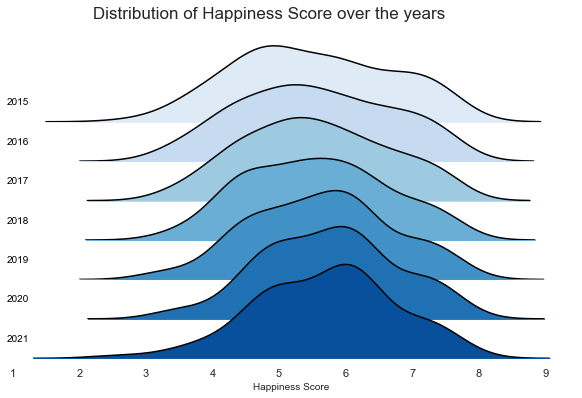

In [3]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
colors = sns.color_palette("Blues",n_colors=7)

s = sns.FacetGrid(df, row="year",hue="year",aspect=11, height=0.8, palette=colors)
ax = sns.kdeplot
s.map_dataframe(ax, x="Happiness Score", fill=True, alpha=1, label='')
s.map_dataframe(ax, x="Happiness Score", color='black',label='')
i = 0 
def label(x, color, label,i=0):
    ax = plt.gca()
    ax.text(0, .2, label, color='black',
            ha="left", va="center", transform=ax.transAxes)

s.map(label, "year")
s.fig.subplots_adjust(hspace=-.6)
s.set(yticklabels=[])
s.set_titles(" ")
s.set(yticks=[], ylabel="")
s.set(xlabel="Happiness Score")
s.despine(bottom=True, left=True)

plt.suptitle('Distribution of Happiness Score over the years',fontsize=17)

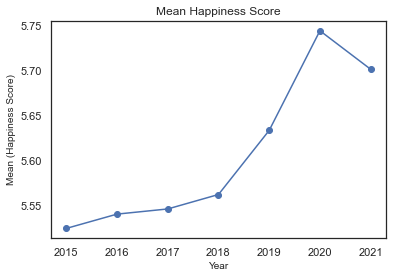

In [4]:
yearly_mean = df.groupby('year')['Happiness Score'].mean()
num_countries = df.groupby('year')['Happiness Score'].apply(lambda x: (x > yearly_mean[x.name]).sum())

# Create a bar chart of the number of countries with happiness score greater than the mean score for each year
plt.plot(yearly_mean,marker='o')

plt.title('Mean Happiness Score')
plt.xlabel('Year')
plt.ylabel('Mean (Happiness Score)')
plt.show()


**Want to identify which countries had the biggest jump in ranks over these 5 years. Or find out Max Rank - Min Rank**

In [5]:
len(df['Country'].unique()) #  = 117 unique countries in our data 

117

In [8]:
pivot_df = pd.read_csv('../Datasets/year_happiness_score.csv')
year = 2015

while year<2022:
    pivot_df[str(year)] = pivot_df[str(year)].astype(int)
    year = year + 1
pivot_df['Country'].astype('str')
pivot_df.set_index('Country',inplace=True)

pivot_df = pivot_df.drop('Algeria')
pivot_df = pivot_df.drop('Jordan')
pivot_df = pivot_df.drop('Malaysia')



Countries with happiness scores dipping (delta = 4)

In [9]:
new_df = pivot_df.diff(axis=1)
new_df = new_df.drop('2015',axis=1)
nd = new_df.le(0).all(axis=1)
countries = new_df[nd].abs().sum(axis=1)
filt_countries = countries.nlargest(6)
coun = filt_countries.index.to_list()
decreasing_ranks = pivot_df.loc[coun]
decreasing_ranks


,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,
Ivory Coast,151,139,128,107,99,85,85
Hungary,104,91,75,69,62,53,53
Bulgaria,134,129,105,100,97,96,88
Romania,86,71,57,52,48,47,46
Estonia,73,72,66,63,55,51,40
Italy,50,50,48,47,36,30,28


In [10]:
import plotly.graph_objs as go

dr = decreasing_ranks


Now we want to record those countries with highest jump/drop in happiness scores. 

In [11]:
pivot_df['diff'] = pivot_df['2021'] - pivot_df['2015']
ir = pivot_df.nlargest(columns='diff',n=5)
ir = ir.drop(columns='diff')



In [12]:
dr = ir
fig = go.Figure()

for country in dr.index:
    fig.add_trace(go.Scatter(x=dr.columns, y=dr.loc[country], name=country,showlegend=False, line=dict(width=2)))
    # if country=='Venezuela':
    #     fig.add_annotation(x=6, y=dr.loc[country]['2021'],text=country,xanchor='left', yanchor='bottom',textangle=360,showarrow=False,font=dict(size=12))
    # else:
    fig.add_annotation(x=6, y=dr.loc[country]['2021'],text=country,xanchor='left', yanchor='middle',textangle=360,showarrow=False,font=dict(size=12))

fig.update_layout(title='Overall decrease in Happiness Rank 2015-2021', xaxis_title='Year', yaxis_title='Happiness Rank')
fig.update_layout(
    yaxis=dict(
        autorange='reversed'
    ))

fig.update_layout(
    width=600,  # Set the width to 800 pixels
    height=800  # Set the height to 600 pixels
)

fig.show()

In [13]:
inr = pivot_df.nsmallest(columns='diff',n=5)
inr = inr.drop(columns='diff')

dr = inr
fig = go.Figure()

for country in dr.index:
    fig.add_trace(go.Scatter(x=dr.columns, y=dr.loc[country], name=country,showlegend=False, line=dict(width=2)))
    fig.add_annotation(x=6.05, y=dr.loc[country]['2021'],text=country,xanchor='left', yanchor='middle',textangle=360,showarrow=False,font=dict(size=12))

fig.update_layout(title='Highest overall increase in Happiness Rank 2015-2021', xaxis_title='Year', yaxis_title='Happiness Rank')
fig.update_layout(
    yaxis=dict(
        autorange='reversed'
    ))

fig.update_layout(
    width=600,  # Set the width to 800 pixels
    height=800  # Set the height to 600 pixels
)

fig.show()

Now we want to see which parameter pairs led to these happiness score rise/falls. 

In [14]:
decreasing_5 = pivot_df.nsmallest(columns='diff',n=20)
increasing_5 = pivot_df.nlargest(columns='diff',n=20)

decreasing_5_countries = decreasing_5.index.to_list()
increasing_5_countries = increasing_5.index.to_list()

merged_countries = decreasing_5_countries + increasing_5_countries


In [15]:
filt_df = df[df['Country'].isin(merged_countries)]
filt_df = filt_df[df['year'].isin([2015,2021])]


C:\Users\Radhika\AppData\Local\Temp\ipykernel_10444\1632732739.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [25]:
col_name = filt_df.columns.to_list()
col_name = col_name[4:]

mask = filt_df.isna()
drop_countries = filt_df[mask.any(axis=1)]['Country'].unique()
filt_df = filt_df[~filt_df['Country'].isin(drop_countries)]

In [26]:
filt_df


,Unnamed: 0,Country,year,Life Ladder,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Generosity
19,19,Argentina,2015,6.697131,0.881224,0.850906,0.767845,0.305355,0.378169,30,6.574,1.05351,1.24823,0.78723,0.11451
25,25,Argentina,2021,5.908279,0.819479,0.816257,0.684860,0.345132,0.326574,57,5.929,9.96200,0.89800,69.00000,-0.18200
26,26,Armenia,2015,4.348320,0.551027,0.901462,0.526853,0.437948,0.170928,127,4.350,0.76821,0.77711,0.72990,0.07855
31,31,Armenia,2021,5.300569,0.795170,0.705334,0.565782,0.477540,0.297146,86,5.283,9.48700,0.79900,67.05500,-0.16800
63,63,Benin,2015,3.624664,0.733384,0.850098,0.554649,0.373397,0.514306,155,3.340,0.28665,0.35386,0.31910,0.18260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,771,Venezuela,2021,5.107553,0.595620,0.823898,0.697587,0.389351,0.175912,107,4.892,9.07300,0.86100,66.70000,-0.16900
779,779,Zambia,2015,4.843164,0.758654,0.871020,0.634062,0.381731,0.631103,85,5.129,0.47038,0.91612,0.29924,0.19591
785,785,Zambia,2021,3.082155,0.832574,0.824031,0.655690,0.348551,0.697678,137,4.073,8.14500,0.70800,55.80900,0.06100
786,786,Zimbabwe,2015,3.703191,0.667193,0.810457,0.639002,0.178861,0.590012,115,4.610,0.27100,1.03276,0.33475,0.18987


In [28]:
filt_df1 = filt_df.drop(columns='Unnamed: 0')
new_df = filt_df1.groupby('Country').pct_change()*100


In [29]:
ndf = new_df.dropna()
ndf = ndf.drop(columns='year')



In [30]:
ndf['Country'] = filt_df['Country'].unique()
ndf = ndf.drop(index=405)
ndf

,Life Ladder,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Generosity,Country
25,-11.778951,-7.006658,-4.072069,-10.807545,13.026367,-13.643395,90.000000,-9.811378,845.600896,-28.058130,8.664910e+03,-258.938084,Argentina
31,21.899243,44.306955,-21.756694,7.388922,9.040403,73.842832,-32.283465,21.448276,1134.948777,2.816847,9.086875e+03,-313.876512,Armenia
69,23.968200,-1.271060,-27.943959,7.599645,16.389641,48.241632,-36.129032,51.047904,2721.210535,38.190245,1.704604e+04,-118.619934,Benin
76,-4.554167,-2.477732,-5.821084,-3.694264,2.693916,-20.798722,35.294118,-2.954160,1227.697298,-17.212620,1.175108e+04,-137.495131,Bolivia
83,12.343624,20.339556,-4.056839,24.338880,6.679151,16.286164,-33.333333,17.458072,1052.325679,-5.348362,8.511171e+03,-54.450177,Bosnia and Herzegovina
90,-8.201495,-0.929684,-4.248152,-3.713372,25.403168,64.756665,118.750000,-9.351282,876.009947,-28.459611,9.455106e+03,-148.716893,Brazil
97,11.433632,32.092422,-5.315261,16.333833,17.996541,-10.073449,-34.328358,24.845899,889.566867,-15.833439,8.641145e+03,-180.530157,Bulgaria
104,4.901152,-2.275991,6.270162,11.719389,1.062701,-7.068875,-25.657895,34.764427,2874.585464,-21.115650,1.986350e+04,-104.138502,Burkina Faso
118,-1.493009,-9.618912,-2.227049,-1.873439,0.024165,-8.217909,-31.578947,20.931326,1838.224852,-20.015321,2.276770e+04,-87.389660,Cameroon
132,-1.486646,4.491410,5.796766,-2.269904,-33.619615,-22.745232,59.259259,-7.466267,809.632841,-21.563047,8.053092e+03,-113.188262,Chile


In [31]:
rank_array =np.where(ndf['Happiness Rank'] >= 0, 'Decreased rank', 'Improved rank')

colors = []
for rank in rank_array:
    if rank == 'Decreased rank':
        colors.append('red')
    elif rank == 'Improved rank':
        colors.append('blue')


In [32]:
# fig = px.scatter(ndf,x='Life Ladder',y='Confidence in national government', color=colors, size=size,text=ndf['Country'])
# fig.show()
ndf.corr()

C:\Users\Radhika\AppData\Local\Temp\ipykernel_37376\177722956.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Life Ladder,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Generosity
Life Ladder,1.000000,0.595698,-0.383018,0.497587,-0.373655,0.315161,-0.527130,0.772920,-0.078902,0.259182,-0.101217,-0.071167
Freedom to make life choices,0.595698,1.000000,-0.178407,0.357567,-0.280898,0.399077,-0.240522,0.226104,-0.217404,0.172339,-0.310144,0.047879
Perceptions of corruption,-0.383018,-0.178407,1.000000,-0.219790,0.115576,-0.497158,0.283498,-0.325549,-0.058495,-0.360473,-0.023879,0.185329
Positive affect,0.497587,0.357567,-0.219790,1.000000,-0.332032,0.213142,-0.434703,0.539651,0.033182,0.014687,-0.022727,-0.067647
Negative affect,-0.373655,-0.280898,0.115576,-0.332032,1.000000,-0.166480,0.550305,-0.335073,0.068473,-0.035744,-0.156420,-0.197555
Confidence in national government,0.315161,0.399077,-0.497158,0.213142,-0.166480,1.000000,-0.102922,0.107843,-0.035153,0.239749,-0.206538,-0.045348
Happiness Rank,-0.527130,-0.240522,0.283498,-0.434703,0.550305,-0.102922,1.000000,-0.711096,-0.249929,-0.279218,-0.140524,-0.349349
Happiness Score,0.772920,0.226104,-0.325549,0.539651,-0.335073,0.107843,-0.711096,1.000000,0.234521,0.275364,0.222346,0.030038
Economy (GDP per Capita),-0.078902,-0.217404,-0.058495,0.033182,0.068473,-0.035153,-0.249929,0.234521,1.000000,0.124229,0.543251,0.421378
Family,0.259182,0.172339,-0.360473,0.014687,-0.035744,0.239749,-0.279218,0.275364,0.124229,1.000000,0.024522,0.133891
